In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

In [4]:
df = pd.read_csv("Morecars.csv")
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
df.describe()

,Unnamed: 0,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,198.000000,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,114.748275,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,0.000000,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,99.000000,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,198.000000,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,297.000000,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,396.000000,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df.isnull().sum()

Unnamed: 0      0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [10]:
df['Unnamed: 0']

0        0
1        1
2        2
3        3
4        4
      ... 
392    392
393    393
394    394
395    395
396    396
Name: Unnamed: 0, Length: 397, dtype: int64

In [21]:
len(df) == (df['Unnamed: 0'] == df.index).sum()

True

In [23]:
del df['Unnamed: 0']

In [24]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

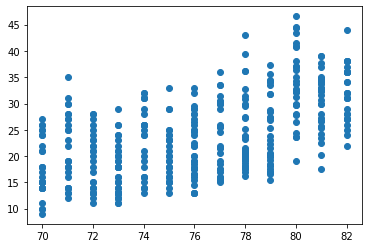

In [27]:
plt.scatter('year', 'mpg', data=df)
plt.show()

In [49]:
df['Eff'] = np.where(df['mpg'] >= df['mpg'].median(),1,0)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Eff
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [50]:
df.groupby('Eff').mean()['mpg']

Eff
0    16.94264
1    29.99050
Name: mpg, dtype: float64

In [51]:
df['horsepower']=pd.to_numeric(df['horsepower'],errors='coerce')

In [52]:
df.groupby('Eff').agg({'mpg':['mean','count','std'],'horsepower':['mean','count','median']}).round(2)

mpg             horsepower             
      mean count   std       mean count median
Eff                                           
0    16.94   197  3.15     130.11   196  125.0
1    29.99   200  5.22      78.83   196   76.5